**User testing with the Wine Quality data set from the UCI repository**
Data consist of wine quality catogorization (on a scale of 1-12) with 10 features. This is the white wine data set.

In [2]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
wine = pd.read_csv('Dropbox/DataScience/YellowBrick/whitewine.csv')

In [4]:
# Feature Analysis Imports 
# NOTE that all these are available for import from the `yellowbrick.features` module 
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates

/Users/tuulimorrill/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualitybin
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,low
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,low
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,low
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,low
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,low


In [6]:
wine.quality.describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [68]:
#add a new column to create a binary class for wine quality 
winemed = wine.quality.median()
wine['qualitybin'] = wine['quality'].apply(lambda x: str('high') if x > 6 else str('low'))

In [70]:
wine.qualitybin.describe()

count     4898
unique       2
top        low
freq      3838
Name: qualitybin, dtype: object

In [65]:
# Load the classification data set
data = wine

# Specify the features of interest
features = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol'
    ]

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data['quality'].as_matrix()

In [66]:
y

array([6, 6, 6, ..., 6, 7, 6])

**Rank 2D**

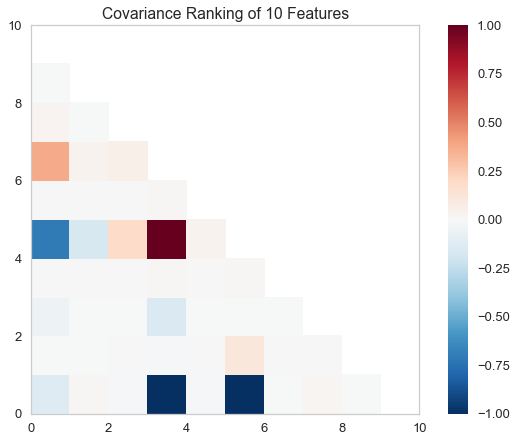

In [48]:
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()    # Draw/show/show the data

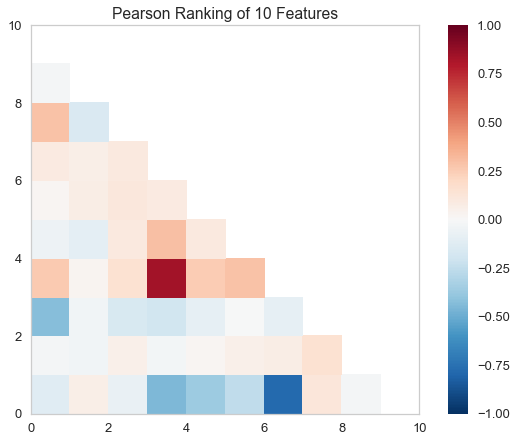

In [49]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()                   # Draw/show/show the data

**RadViz**

In [73]:
# Load the classification data set
data = wine

# Specify the features of interest and the classes of the target
features = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol'
    ]
classes = ['low','high']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data.qualitybin.as_matrix()

In [74]:
y

array(['low', 'low', 'low', ..., 'low', 'high', 'low'], dtype=object)

In [75]:
# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()         # Draw/show/show the data

TypeError: list indices must be integers or slices, not str

**Parallel Coordinates**

In [52]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()         # Draw/show/show the data

TypeError: list indices must be integers or slices, not str

**Regressor Evaluation**

In [22]:
# Regression Evaluation Imports

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [28]:
# Load the data
df = wine
feature_names = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol'
    ]

target_name = 'quality'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

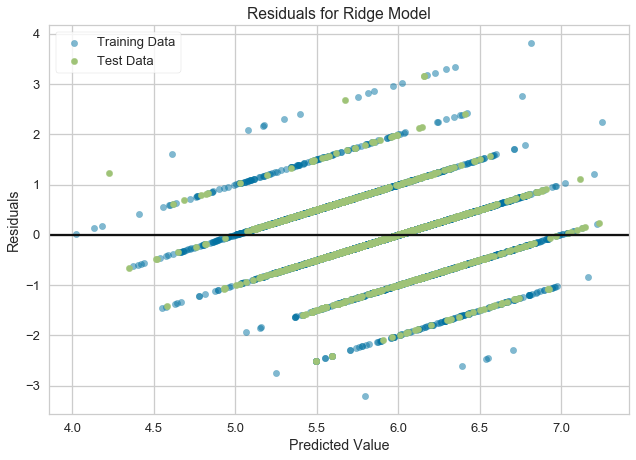

In [29]:
# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.show()             # Draw/show/show the data

**Prediction Error Plot**

In [49]:
# Load the data
df = wine
feature_names = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol'
    ]

target_name = 'quality'

# Get the X and y data from the DataFrame
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

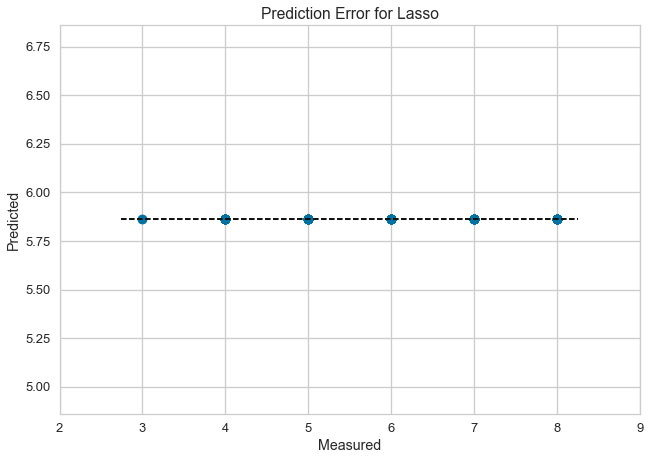

In [50]:
# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.show()             # Draw/show/show the data

**Classifier Evaluation**

In [79]:
# Classifier Evaluation Imports

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance

In [80]:
# Load the classification data set
data = wine

# Specify the features of interest and the classes of the target
features = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol'
    ]

classes = data['qualitybin']

# Extract the numpy arrays from the data frame
X = data[features].as_matrix()
y = data['qualitybin'].as_matrix()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.show()             # Draw/show/show the data

KeyError: 'high'